### 1. Data Preprocessing

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
proj_dir = '/content/drive/MyDrive/AI4Science_Public/gold_standard_generation'
os.chdir(proj_dir)
!ls

Mounted at /content/drive
 significant_genes_report_corrected.csv    TCGA.PCPG.sampleMap_HiSeqV2_PANCAN.gz
'TCGA_Bladder_Cancer_(BLCA)'		   TCGA.PCPG.sampleMap_PCPG_clinicalMatrix
 TCGA.BRCA.sampleMap_BRCA_clinicalMatrix   TCGA.SARC.sampleMap_HiSeqV2_PANCAN
 TCGA.BRCA.sampleMap_HiSeqV2_PANCAN	   TCGA.SARC.sampleMap_SARC_clinicalMatrix
'TCGA_Melanoma_(SKCM)'			   TCGA.THYM.sampleMap_HiSeqV2_PANCAN
 TCGA.MESO.sampleMap_HiSeqV2_PANCAN	   TCGA.THYM.sampleMap_THYM_clinicalMatrix
 TCGA.MESO.sampleMap_MESO_clinicalMatrix   TCGA.UCEC.sampleMap_HiSeqV2_PANCAN.gz
'TCGA_Ocular_melanomas_(UVM)'		   TCGA.UCEC.sampleMap_UCEC_clinicalMatrix


In [2]:
!pip install sparse_lmm

In [3]:
# Read file

import pandas as pd
import numpy as np

clinical_data = pd.read_csv('TCGA.PCPG.sampleMap_PCPG_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv('TCGA.PCPG.sampleMap_HiSeqV2_PANCAN.gz', sep='\t', index_col=0)

In [4]:
clinical_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,age_at_initial_pathologic_diagnosis,bcr_followup_barcode,bcr_patient_barcode,bcr_sample_barcode,ct_scan,...,_GENOMIC_ID_TCGA_PCPG_exp_HiSeqV2_exon,_GENOMIC_ID_TCGA_PCPG_PDMRNAseqCNV,_GENOMIC_ID_TCGA_PCPG_miRNA_HiSeq,_GENOMIC_ID_data/public/TCGA/PCPG/miRNA_HiSeq_gene,_GENOMIC_ID_TCGA_PCPG_mutation_bcgsc_gene,_GENOMIC_ID_TCGA_PCPG_RPPA,_GENOMIC_ID_TCGA_PCPG_mutation_ucsc_maf_gene,_GENOMIC_ID_TCGA_PCPG_gistic2,_GENOMIC_ID_TCGA_PCPG_PDMRNAseq,_GENOMIC_ID_TCGA_PCPG_exp_HiSeqV2_percentile
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-P7-A5NX-01,TCGA-P7-A5NX-01,TCGA-P7-A5NX,TCGA Pheochromocytoma & Paraganglioma (PCPG),pheochromocytoma & paraganglioma,Paraganglia,78,TCGA-P7-A5NX-F62809,TCGA-P7-A5NX,TCGA-P7-A5NX-01A,YES,...,2dc9f559-fbfd-4290-82d2-e65bc3d8c0e4,NaN,TCGA-P7-A5NX-01,TCGA-P7-A5NX-01,TCGA-P7-A5NX-01A-11D-A35D-08,BF79A366-BA96-4CA3-B44C-50D267EF389E,TCGA-P7-A5NX-01A-11D-A35D-08,NaN,TCGA-P7-A5NX-01,2dc9f559-fbfd-4290-82d2-e65bc3d8c0e4
TCGA-P7-A5NY-01,TCGA-P7-A5NY-01,TCGA-P7-A5NY,TCGA Pheochromocytoma & Paraganglioma (PCPG),pheochromocytoma & paraganglioma,Paraganglia,21,TCGA-P7-A5NY-F62808,TCGA-P7-A5NY,NaN,YES,...,f9d224fb-5f3b-4261-8625-29c117b0b56c,TCGA-P7-A5NY-01,TCGA-P7-A5NY-01,TCGA-P7-A5NY-01,TCGA-P7-A5NY-01A-12D-A35D-08,NaN,TCGA-P7-A5NY-01A-12D-A35D-08,TCGA-P7-A5NY-01A-12D-A35C-01,TCGA-P7-A5NY-01,f9d224fb-5f3b-4261-8625-29c117b0b56c
TCGA-P7-A5NY-05,TCGA-P7-A5NY-05,TCGA-P7-A5NY,TCGA Pheochromocytoma & Paraganglioma (PCPG),pheochromocytoma & paraganglioma,Paraganglia,21,TCGA-P7-A5NY-F62808,TCGA-P7-A5NY,TCGA-P7-A5NY-05A,YES,...,08f40bb8-22b9-4fe3-be97-6041aafe35e7,NaN,TCGA-P7-A5NY-05,TCGA-P7-A5NY-05,TCGA-P7-A5NY-05A-11D-A35D-08,NaN,TCGA-P7-A5NY-05A-11D-A35D-08,NaN,NaN,08f40bb8-22b9-4fe3-be97-6041aafe35e7
TCGA-P8-A5KC-01,TCGA-P8-A5KC-01,TCGA-P8-A5KC,TCGA Pheochromocytoma & Paraganglioma (PCPG),pheochromocytoma & paraganglioma,Paraganglia,48,TCGA-P8-A5KC-F69550,TCGA-P8-A5KC,TCGA-P8-A5KC-01A,NaN,...,f8c789c9-629e-4a36-9cbf-2e52ecabe74c,TCGA-P8-A5KC-01,TCGA-P8-A5KC-01,TCGA-P8-A5KC-01,TCGA-P8-A5KC-01A-11D-A35D-08,A3F29179-7C6D-4A8A-A549-661F5283FFEB,TCGA-P8-A5KC-01A-11D-A35D-08,TCGA-P8-A5KC-01A-11D-A35C-01,TCGA-P8-A5KC-01,f8c789c9-629e-4a36-9cbf-2e52ecabe74c
TCGA-P8-A5KC-11,TCGA-P8-A5KC-11,TCGA-P8-A5KC,TCGA Pheochromocytoma & Paraganglioma (PCPG),pheochromocytoma & paraganglioma,Paraganglia,48,TCGA-P8-A5KC-F69550,TCGA-P8-A5KC,NaN,NaN,...,d0c544ce-2fab-4111-8351-8595a0089b31,NaN,TCGA-P8-A5KC-11,TCGA-P8-A5KC-11,NaN,NaN,NaN,NaN,NaN,d0c544ce-2fab-4111-8351-8595a0089b31


In [5]:
gene_data.head()

,TCGA-S7-A7WN-01,TCGA-WB-A80V-01,TCGA-P7-A5NY-05,TCGA-S7-A7WR-01,TCGA-WB-A814-01,TCGA-P8-A6RY-01,TCGA-RW-A67X-01,TCGA-SP-A6QK-01,TCGA-W2-A7HA-01,TCGA-QR-A70O-01,...,TCGA-RM-A68W-01,TCGA-QR-A705-01,TCGA-QR-A70X-01,TCGA-RW-A68C-01,TCGA-QR-A6H5-01,TCGA-RW-A680-01,TCGA-SR-A6N0-01,TCGA-SR-A6MT-01,TCGA-WB-A815-01,TCGA-SP-A6QD-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,0.117308,-0.051992,0.675108,0.883508,1.499708,-1.021492,1.069208,0.669808,0.903608,1.306508,...,-0.455392,0.055908,0.601308,0.903808,0.840708,-0.491592,-0.607392,-0.425892,1.521508,0.484408
HIF3A,-0.740226,-2.580126,-3.947126,-2.035026,-2.324126,2.671774,-0.305426,1.902974,-1.044826,-0.473426,...,1.278374,-1.912526,1.009274,0.351774,0.420674,0.918574,0.882974,-2.068026,-0.919026,1.243674
RNF17,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,0.334765,0.088865,0.229065,-0.531035,-0.531035,...,1.827465,-0.531035,-0.531035,-0.531035,-0.531035,4.835765,-0.531035,-0.531035,-0.531035,-0.531035
RNF10,0.264728,0.050628,-0.443072,-0.355772,-0.130472,0.178728,0.004228,0.262228,-0.433472,0.016528,...,0.361928,-0.154672,0.004328,0.209928,-0.175572,0.279128,0.165628,0.351828,0.033528,-0.172172
RNF11,0.378022,0.910222,0.647422,0.354322,0.815522,1.334322,0.633822,0.580222,0.277022,-0.144478,...,0.507622,1.407222,0.718522,0.897922,0.876122,-0.358278,0.782322,1.231222,1.112122,1.260022


In [6]:
# Set Basic info

#gene_fullname = 'BRCA gene'
#gene = 'brca'
trait = 'Pheochromocytoma and Paraganglioma'
condition = 'underweight'
condition_col = 'initial_weight'

gene_list = gene_data.index.tolist()
# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_list)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')

The clinical dataset has 77 features, and the gene dataset includes 20530 genes


In [7]:
# Merge clinical_data and gene_data on their indices - sample_ID, corresponding to each person
merged_data = clinical_data.join(gene_data.T)
merged_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,age_at_initial_pathologic_diagnosis,bcr_followup_barcode,bcr_patient_barcode,bcr_sample_barcode,ct_scan,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-P7-A5NX-01,TCGA-P7-A5NX-01,TCGA-P7-A5NX,TCGA Pheochromocytoma & Paraganglioma (PCPG),pheochromocytoma & paraganglioma,Paraganglia,78,TCGA-P7-A5NX-F62809,TCGA-P7-A5NX,TCGA-P7-A5NX-01A,YES,...,-0.123378,2.568483,-0.040233,-0.65589,-0.849877,-0.357986,1.155073,-0.148395,2.282067,1.055988
TCGA-P7-A5NY-01,TCGA-P7-A5NY-01,TCGA-P7-A5NY,TCGA Pheochromocytoma & Paraganglioma (PCPG),pheochromocytoma & paraganglioma,Paraganglia,21,TCGA-P7-A5NY-F62808,TCGA-P7-A5NY,NaN,YES,...,-0.401978,2.279883,-1.414733,-1.28139,-1.258577,-1.239386,-0.073227,-0.638095,1.798967,0.374388
TCGA-P7-A5NY-05,TCGA-P7-A5NY-05,TCGA-P7-A5NY,TCGA Pheochromocytoma & Paraganglioma (PCPG),pheochromocytoma & paraganglioma,Paraganglia,21,TCGA-P7-A5NY-F62808,TCGA-P7-A5NY,TCGA-P7-A5NY-05A,YES,...,-0.748878,-1.587117,0.247267,-1.28139,-0.708977,-0.048386,2.311673,-0.533195,0.122367,0.947788
TCGA-P8-A5KC-01,TCGA-P8-A5KC-01,TCGA-P8-A5KC,TCGA Pheochromocytoma & Paraganglioma (PCPG),pheochromocytoma & paraganglioma,Paraganglia,48,TCGA-P8-A5KC-F69550,TCGA-P8-A5KC,TCGA-P8-A5KC-01A,NaN,...,-0.748878,1.463783,0.349467,-1.28139,-0.917277,1.081514,3.745973,-1.170495,1.701167,0.413588
TCGA-P8-A5KC-11,TCGA-P8-A5KC-11,TCGA-P8-A5KC,TCGA Pheochromocytoma & Paraganglioma (PCPG),pheochromocytoma & paraganglioma,Paraganglia,48,TCGA-P8-A5KC-F69550,TCGA-P8-A5KC,NaN,NaN,...,-0.748878,4.272883,0.510467,-1.28139,-0.483577,0.335514,0.590473,0.358705,0.705667,1.535788


In [8]:
# Only select relevant columns

#input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
feature_cols = [condition_col] + gene_list
merged_data = merged_data[feature_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,initial_weight,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-P7-A5NX-01,60.0,-0.249192,0.627774,-0.531035,-0.122972,1.240822,-0.79301,0.262206,0.829154,-0.423399,...,-0.123378,2.568483,-0.040233,-0.65589,-0.849877,-0.357986,1.155073,-0.148395,2.282067,1.055988
TCGA-P7-A5NY-01,0.0,0.931208,-0.483626,-0.531035,-0.408272,0.794222,0.04209,0.433806,0.209954,-0.423399,...,-0.401978,2.279883,-1.414733,-1.28139,-1.258577,-1.239386,-0.073227,-0.638095,1.798967,0.374388
TCGA-P7-A5NY-05,200.0,0.675108,-3.947126,-0.531035,-0.443072,0.647422,-0.57541,0.215106,0.779154,-0.423399,...,-0.748878,-1.587117,0.247267,-1.28139,-0.708977,-0.048386,2.311673,-0.533195,0.122367,0.947788
TCGA-P8-A5KC-01,260.0,0.386208,1.778974,-0.531035,0.003528,0.668822,0.13079,-0.228694,3.333554,-0.423399,...,-0.748878,1.463783,0.349467,-1.28139,-0.917277,1.081514,3.745973,-1.170495,1.701167,0.413588
TCGA-P8-A5KC-11,0.0,-0.530592,1.908874,-0.531035,0.877428,0.607622,-0.15621,-0.334894,1.183554,-0.423399,...,-0.748878,4.272883,0.510467,-1.28139,-0.483577,0.335514,0.590473,0.358705,0.705667,1.535788


In [9]:
# Decode the trait information from Sample IDs. Tumor types range from 01 - 09, normal types from 10 - 19.
# Create a function to check the last two digits of a row index

def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])

    if 1 <= last_two_digits <= 9:
        return 1
    elif 10 <= last_two_digits <= 19:
        return 0
    else:
        return -1

# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

,initial_weight,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Pheochromocytoma and Paraganglioma
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-P7-A5NX-01,60.0,-0.249192,0.627774,-0.531035,-0.122972,1.240822,-0.79301,0.262206,0.829154,-0.423399,...,2.568483,-0.040233,-0.65589,-0.849877,-0.357986,1.155073,-0.148395,2.282067,1.055988,1
TCGA-P7-A5NY-01,0.0,0.931208,-0.483626,-0.531035,-0.408272,0.794222,0.04209,0.433806,0.209954,-0.423399,...,2.279883,-1.414733,-1.28139,-1.258577,-1.239386,-0.073227,-0.638095,1.798967,0.374388,1
TCGA-P7-A5NY-05,200.0,0.675108,-3.947126,-0.531035,-0.443072,0.647422,-0.57541,0.215106,0.779154,-0.423399,...,-1.587117,0.247267,-1.28139,-0.708977,-0.048386,2.311673,-0.533195,0.122367,0.947788,1
TCGA-P8-A5KC-01,260.0,0.386208,1.778974,-0.531035,0.003528,0.668822,0.13079,-0.228694,3.333554,-0.423399,...,1.463783,0.349467,-1.28139,-0.917277,1.081514,3.745973,-1.170495,1.701167,0.413588,1
TCGA-P8-A5KC-11,0.0,-0.530592,1.908874,-0.531035,0.877428,0.607622,-0.15621,-0.334894,1.183554,-0.423399,...,4.272883,0.510467,-1.28139,-0.483577,0.335514,0.590473,0.358705,0.705667,1.535788,0


### 2. Preliminary analysis

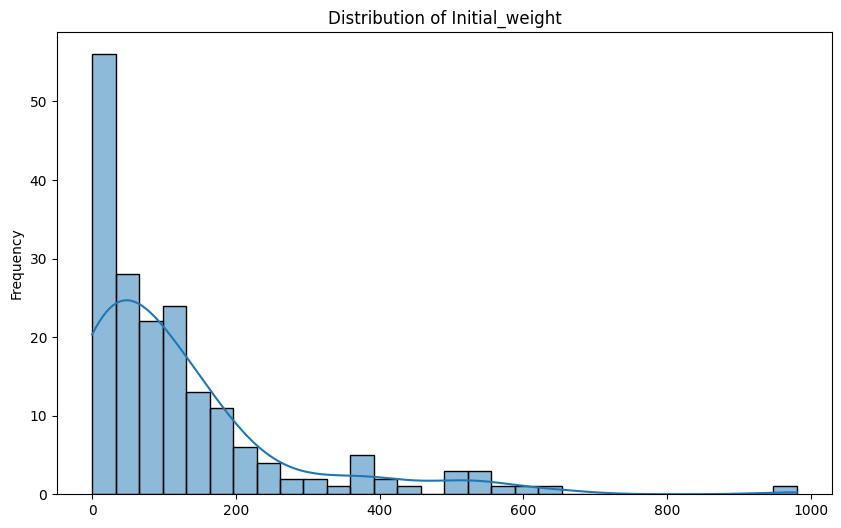

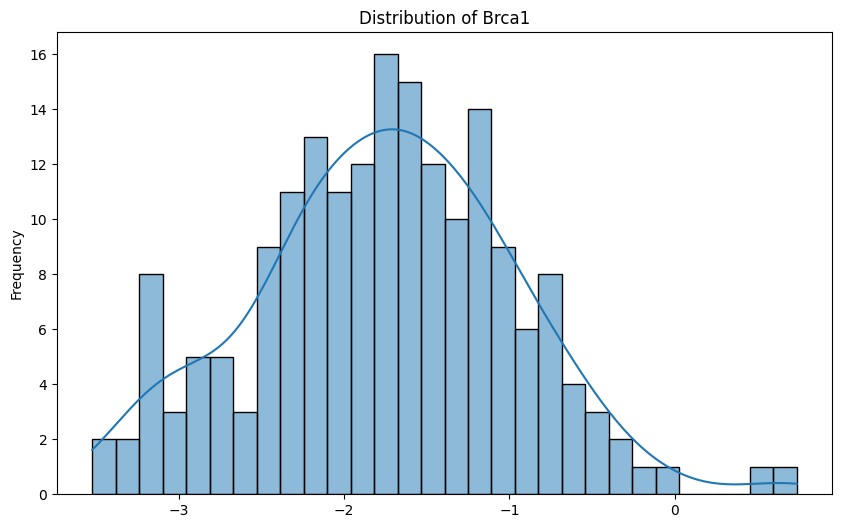

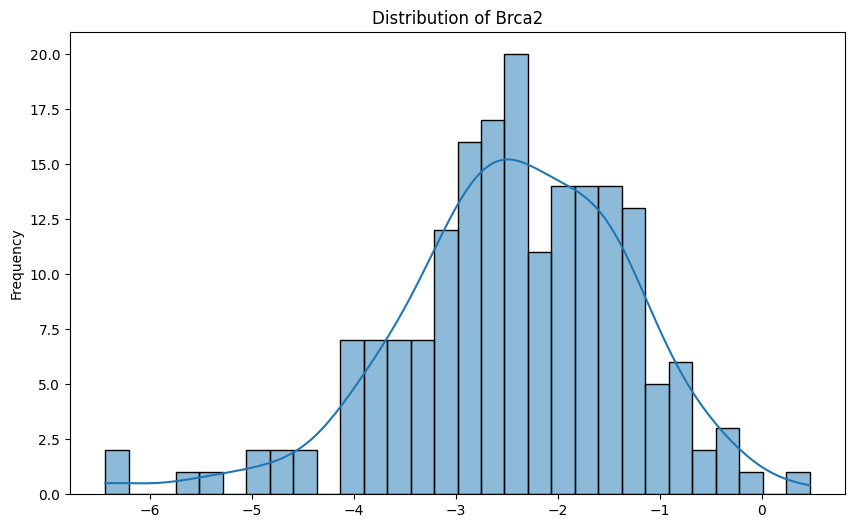

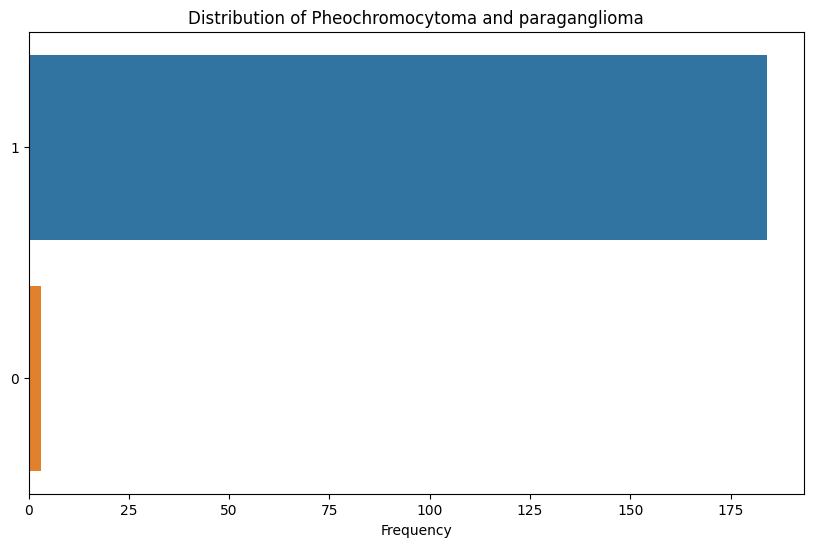

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

# For example, we may want to choose a few genes we are interested in for visualization:
interested_genes = [col for col in gene_list if 'brca' in col.lower()]
analyze_distributions(merged_data, numerical_columns=[condition_col, *interested_genes], categorical_columns=[trait])

In [11]:
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
feature_cols = merged_data.columns.tolist()[:-1]

merged_data.head()

,underweight,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Pheochromocytoma and Paraganglioma
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-P7-A5NX-01,0,-0.249192,0.627774,-0.531035,-0.122972,1.240822,-0.79301,0.262206,0.829154,-0.423399,...,2.568483,-0.040233,-0.65589,-0.849877,-0.357986,1.155073,-0.148395,2.282067,1.055988,1
TCGA-P7-A5NY-01,0,0.931208,-0.483626,-0.531035,-0.408272,0.794222,0.04209,0.433806,0.209954,-0.423399,...,2.279883,-1.414733,-1.28139,-1.258577,-1.239386,-0.073227,-0.638095,1.798967,0.374388,1
TCGA-P7-A5NY-05,0,0.675108,-3.947126,-0.531035,-0.443072,0.647422,-0.57541,0.215106,0.779154,-0.423399,...,-1.587117,0.247267,-1.28139,-0.708977,-0.048386,2.311673,-0.533195,0.122367,0.947788,1
TCGA-P8-A5KC-01,0,0.386208,1.778974,-0.531035,0.003528,0.668822,0.13079,-0.228694,3.333554,-0.423399,...,1.463783,0.349467,-1.28139,-0.917277,1.081514,3.745973,-1.170495,1.701167,0.413588,1
TCGA-P8-A5KC-11,0,-0.530592,1.908874,-0.531035,0.877428,0.607622,-0.15621,-0.334894,1.183554,-0.423399,...,4.272883,0.510467,-1.28139,-0.483577,0.335514,0.590473,0.358705,0.705667,1.535788,0


### 3. Do regression & Cross Validation

In [12]:
import pandas as pd
from sparse_lmm import VariableSelection

def preprocess_data(X_train, X_test=None):
    # Normalize training data
    mean_train = np.mean(X_train, axis=0)
    std_train = np.std(X_train, axis=0)

    X_train_normalized = (X_train - mean_train) / std_train

    # Set columns with zero std to zero for training data
    zero_std_columns_train = np.where(std_train == 0)[0]
    X_train_normalized[:, zero_std_columns_train] = 0

    if X_test is not None:
        # Normalize test data using training data's mean and std
        X_test_normalized = (X_test - mean_train) / std_train
        X_test_normalized[:, zero_std_columns_train] = 0
    else:
        X_test_normalized = None

    return X_train_normalized, X_test_normalized


In [13]:
def cross_validation(X, y, k=5):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        # Preprocess the train and test data
        X_train, X_test = preprocess_data(X_train, X_test)

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        # Turn the predictions into binary values using a threshold of 0.5
        binary_predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy for this fold
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies), np.std(accuracies)

# Select relevant columns and convert to numpy array
y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

cv_mean, cv_std = cross_validation(X, y)
print(f'The cross-validation accuracy is {(cv_mean * 100):.2f}% ± {(cv_std * 100):.2f}%')

<ipython-input-12-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
<ipython-input-12-abef56c5c9ec>:17: RuntimeWarning: invalid value encountered in divide
  X_test_normalized = (X_test - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
<ipython-input-12-abef56c5c9ec>:17: RuntimeWarning: divide by zero encountered in divide
  X_test_normalized = (X_test - mean_train) / std_train


The cross-validation accuracy is 70.27% ± 5.89%


In [14]:
# Conduct regression on the whole dataset
# Instantiate the VariableSelection class
var_select = VariableSelection()

y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

X, _ = preprocess_data(X)
# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
p_values = [np.exp(-p) for p in nlog_p_values]

<ipython-input-12-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)


In [15]:
# Conduct regression on the whole dataset

var_select = VariableSelection()

y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

X, _ = preprocess_data(X)
# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
p_values = [np.exp(-p) for p in nlog_p_values]

<ipython-input-12-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)


### 4. Discussion

In [16]:
import pandas as pd
from statsmodels.stats.multitest import multipletests


# Create a DataFrame for the regression results
regression_df = pd.DataFrame({
    'Variable': feature_cols,
    'Coefficient': coefficients,
    'p_value': p_values
})

# Extract information about the lifestyle condition's effect
condition_effect = regression_df.iloc[0]

# Report the effect of the lifestyle condition
print(f"Effect of the condition on the target variable:")
print(f"Variable: {condition}")
print(f"Coefficient: {condition_effect['Coefficient']:.4f}")
print(f"p-value: {condition_effect['p_value']:.4g}\n")

Effect of the condition on the target variable:
Variable: underweight
Coefficient: -0.0008
p-value: 0.9119



In [17]:
threshold = 0.05
# Apply the Benjamini-Hochberg correction
rejected, corrected_p_values, _, _ = multipletests(regression_df['p_value'][1:], alpha=threshold, method='fdr_bh')

# Add the corrected p-values to the DataFrame (ignoring the first row which is the condition)
regression_df.loc[1:, 'corrected_p_value'] = corrected_p_values

# Now filter based on the corrected p-values
significant_genes = regression_df.loc[(regression_df.index > 0) & (regression_df['corrected_p_value'] < threshold)]
significant_genes_sorted = significant_genes.sort_values('corrected_p_value')

# Print and/or save your results as before
print(f"Genes with corrected p-value < {threshold}, affecting the trait {trait} conditional on the factor {condition}, sorted by corrected p-value:")
print(significant_genes_sorted[['Variable', 'Coefficient', 'corrected_p_value']].to_string(index=False))
print(f"\nFound {len(significant_genes_sorted)} significant genes with corrected p-value < {threshold}")
# Save this to a CSV file
significant_genes_sorted.to_csv('significant_genes_report_corrected.csv', index=False)

Genes with corrected p-value < 0.05, affecting the trait Pheochromocytoma and Paraganglioma conditional on the factor underweight, sorted by corrected p-value:
    Variable  Coefficient  corrected_p_value
    RBMY1A3P     0.491979      1.048026e-134
       OR2J3     0.491979      1.048026e-134
       LACRT     0.491979      1.048026e-134
      OR4C16    -0.491979      1.048026e-134
      OR52M1     0.491979      1.048026e-134
      TEX13A     0.491979      1.048026e-134
   LOC254312    -0.491979      1.048026e-134
      OR10G8    -0.491979      1.048026e-134
       IL1F6     0.491979      1.048026e-134
      SNAR-E     0.491979      1.048026e-134
      SNAR-H    -0.491979      1.048026e-134
        SUN5     0.491979      1.048026e-134
    SNORD11B    -0.491979      1.048026e-134
 SNORD116-19     0.491979      1.048026e-134
     SNORA35    -0.491979      1.048026e-134
       CDY1B    -0.491979      1.048026e-134
     DEFB110    -0.491979      1.048026e-134
       BANF2    -0.491979     